# Using Cluster Analysis and Classification analysis on charactersitics of Wine data from UC repository.
## Anirudh Bhanu Teja Addala


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import math

import statsmodels.formula.api as smf
#import statsmodels.api as sm 

In [2]:
white_wine =pd.read_csv(r"C:\Users\aniru\OneDrive\Documents\SEMESTER-I\Intl Data Anlys\Home_work_assignment_4\winequality-white.csv",sep=';',
                       names=['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol','quality'], skiprows=1)
white_wine.head()
#white_wine.describe()
#white_wine.shape
#len(white_wine["quality"].unique())
#a=white_wine["quality"].unique().sort()
#type(a)
#white_wine.columns.values
#length of number of columns
white_wine_features =white_wine.iloc[:,0:len(white_wine.columns)-1]
#white_wine_features --X-variables in Linear Model
print(white_wine_features.head())
white_wine_target = white_wine.iloc[:,-1]
#white wine target variable --> quality of wine -Y-axis
print(white_wine_target.head())





   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9  
0    6
1

In [3]:
for b in list(white_wine_features.columns.values):
    print(b,white_wine.corr().loc['quality',b])

fixed_acidity -0.11366283071301507
volatile_acidity -0.19472296892113355
citric_acid -0.009209090883975294
residual_sugar -0.09757682889469202
chlorides -0.20993441094675602
free_sulfur_dioxide 0.008158067123435949
total_sulfur_dioxide -0.17473721759706043
density -0.3071233127347255
pH 0.09942724573666256
sulphates 0.05367787713279186
alcohol 0.4355747154613688


In [4]:
l=list(white_wine_features.columns.values)
data_table_cols=['n_features','formula','feature_added','R-squared','AIC']
data_list=[]
n=1        
for i in l:
    #X =white_wine_features[i]
    #y=white_wine_target
    #X=sm.add_constant(X)
    #model_quality = sm.OLS(y, X).fit()
    st1 ='quality ~ '+i
    model_quality=smf.ols(formula=st1,data=white_wine).fit()
    data_list.append([n,st1,i,round(model_quality.rsquared,4),round(model_quality.aic,4)])
data_table =pd.DataFrame(data_list,columns=data_table_cols)

In [5]:
b=str(data_table.loc[data_table['R-squared'].idxmax()]['formula'])

In [6]:
l=list(white_wine_features.columns.values)
data_table_cols=['n_features','formula','feature_added','R-squared','AIC']
data_list=[]
data_table =pd.DataFrame(data_list,columns=data_table_cols)
data_table1 =pd.DataFrame(data_list,columns=data_table_cols)
for n in range(1,len(white_wine.columns)):
        data_list=[]
        for i in l:
            if n==1:
                st1='quality ~ '+i
                model_quality=smf.ols(formula=st1,data=white_wine).fit()
                data_list.append([n,st1,i,round(model_quality.rsquared,3),round(model_quality.aic,0)])
            else:
                st1=form+'+'+i
                model_quality=smf.ols(formula=st1,data=white_wine).fit()
                data_list.append([n,st1,i,round(model_quality.rsquared,3),round(model_quality.aic,0)])
        data_table1=pd.DataFrame(data_list,columns=data_table_cols)
        a=str(data_table1.loc[data_table1['R-squared'].idxmax()]['feature_added'])
        l.remove(a)
        if(n>1):
            d=data_table[data_table["n_features"]==n-1]
            k_aic=d.loc[d['R-squared'].idxmax()]['AIC']
            d1=data_table1['AIC'].min()
            if (d1>k_aic):
                print("The best model is found with features: ",n-1)
                break
        form=str(data_table1.loc[data_table1['R-squared'].idxmax()]['formula'])
        data_table=data_table.append(data_table1, ignore_index=True)
        #print(l)
        #n=1
        #print(n)
        n +=1

The best model is found with features:  8


# 1
__a.	(8) Do linear regression to learn the single-feature regression models, one model for each of the 11 features. Find the R2 and AIC values for each of these models. Report these values for the models. __

In [7]:

#st1 ='quality ~ alcohol'
#model_quality1 = smf.ols(formula=st1,data=white_wine).fit()
#model_quality1.summary()
#1The univariate regression models and their R^2 and AIC values are given by:
print('The univariate regression models and their R^2 and AIC values are given by:')
data_table[data_table.n_features==1]

    

The univariate regression models and their R^2 and AIC values are given by:


,n_features,formula,feature_added,R-squared,AIC
0,1,quality ~ fixed_acidity,fixed_acidity,0.013,12650.0
1,1,quality ~ volatile_acidity,volatile_acidity,0.038,12524.0
2,1,quality ~ citric_acid,citric_acid,0.000,12713.0
3,1,quality ~ residual_sugar,residual_sugar,0.010,12666.0
4,1,quality ~ chlorides,chlorides,0.044,12492.0
5,1,quality ~ free_sulfur_dioxide,free_sulfur_dioxide,0.000,12713.0
6,1,quality ~ total_sulfur_dioxide,total_sulfur_dioxide,0.031,12561.0
7,1,quality ~ density,density,0.094,12228.0
8,1,quality ~ pH,pH,0.010,12665.0
9,1,quality ~ sulphates,sulphates,0.003,12699.0


# 1
__b.	(8) Select the model with the highest R2 value, combine with its feature other features, one at a time, and thus generate all bivariate regression models (models containing two features). One of these two features is from the selected single-feature model and the other is from one of the remaining 10 features. Report the R2 and AIC values for all the bivariate regression models.__

In [8]:
#2 The Bivariate regression models and their R^2 and AIC values are given by:
print('The Bivariate regression models and their R^2 and AIC values are given by:')
data_table[data_table.n_features==2]


The Bivariate regression models and their R^2 and AIC values are given by:


,n_features,formula,feature_added,R-squared,AIC
11,2,quality ~ alcohol+fixed_acidity,fixed_acidity,0.194,11662.0
12,2,quality ~ alcohol+volatile_acidity,volatile_acidity,0.240,11370.0
13,2,quality ~ alcohol+citric_acid,citric_acid,0.190,11681.0
14,2,quality ~ alcohol+residual_sugar,residual_sugar,0.202,11610.0
15,2,quality ~ alcohol+chlorides,chlorides,0.193,11665.0
16,2,quality ~ alcohol+free_sulfur_dioxide,free_sulfur_dioxide,0.204,11596.0
17,2,quality ~ alcohol+total_sulfur_dioxide,total_sulfur_dioxide,0.190,11682.0
18,2,quality ~ alcohol+density,density,0.192,11668.0
19,2,quality ~ alcohol+pH,pH,0.192,11671.0
20,2,quality ~ alcohol+sulphates,sulphates,0.193,11662.0


# 1
__ c.	(8) Select the bivariate model with the highest R2 value as the Best model at this stage. Combine a third feature from the remaining nine features with this selected bivariate model to build (and then select the best) 3-feature regression models. Report the R2 and AIC values of all these models.__

In [9]:
#3 The 3-feature regression models and their R^2 and AIC values are given by:
print('The 3-feature regression models and their R^2 and AIC values are given by:')
data_table[data_table.n_features==3]

The 3-feature regression models and their R^2 and AIC values are given by:


,n_features,formula,feature_added,R-squared,AIC
21,3,quality ~ alcohol+volatile_acidity+fixed_acidity,fixed_acidity,0.244,11344.0
22,3,quality ~ alcohol+volatile_acidity+citric_acid,citric_acid,0.240,11371.0
23,3,quality ~ alcohol+volatile_acidity+residual_sugar,residual_sugar,0.259,11252.0
24,3,quality ~ alcohol+volatile_acidity+chlorides,chlorides,0.241,11364.0
25,3,quality ~ alcohol+volatile_acidity+free_sulfur...,free_sulfur_dioxide,0.251,11303.0
26,3,quality ~ alcohol+volatile_acidity+total_sulfu...,total_sulfur_dioxide,0.243,11353.0
27,3,quality ~ alcohol+volatile_acidity+density,density,0.247,11328.0
28,3,quality ~ alcohol+volatile_acidity+pH,pH,0.242,11362.0
29,3,quality ~ alcohol+volatile_acidity+sulphates,sulphates,0.243,11353.0


# 1
__d.	(14)Repeat the steps above to generate (k+1)-feature models from the k-feature models until the following situation arises: all the (k+1)-feature models have an AIC value higher than the AIC value of the k-feature model from which they are being generated. Stop the process and report the k-feature model found as being the best regression model for this data. Report the features included, their coefficients, and p-values for the coefficients. Comment on the magnitudes of the p-values.__

In [10]:
#d K+1 feature best model
d=data_table.loc[data_table.groupby(['n_features'])['R-squared'].idxmax()]
print('The best model is found with features:  8')
d
#print(str(d[d.n_features==8]['formula']))

The best model is found with features:  8


,n_features,formula,feature_added,R-squared,AIC
10,1,quality ~ alcohol,alcohol,0.190,11683.0
12,2,quality ~ alcohol+volatile_acidity,volatile_acidity,0.240,11370.0
23,3,quality ~ alcohol+volatile_acidity+residual_sugar,residual_sugar,0.259,11252.0
33,4,quality ~ alcohol+volatile_acidity+residual_su...,free_sulfur_dioxide,0.264,11218.0
42,5,quality ~ alcohol+volatile_acidity+residual_su...,density,0.269,11187.0
49,6,quality ~ alcohol+volatile_acidity+residual_su...,pH,0.275,11147.0
55,7,quality ~ alcohol+volatile_acidity+residual_su...,sulphates,0.280,11115.0
56,8,quality ~ alcohol+volatile_acidity+residual_su...,fixed_acidity,0.282,11106.0


In [11]:
std1='quality ~ alcohol+volatile_acidity+residual_sugar+free_sulfur_dioxide+density+pH+sulphates+fixed_acidity'
model_quality1=smf.ols(formula=std1,data=white_wine).fit()
model_quality1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Thu, 29 Nov 2018   Prob (F-statistic):               0.00
Time:                        20:43:56   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4889   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             154.1062     18.100      8.514      0.000     118.622     189.591
alcohol                 0.1932      0.024      8.021      0.000       0.146       0.240
volatile_acidity       -1.8881      0.110    -17.242      0.000      -2.103      -1.673
residual_sugar          0.0828      0.007     11.370      0.000       0.069       0.097
free_sulfur_dioxide     0.0033      0.001      4.950      0.000       0.002       0.005
density              -154.2913     18.344     -8.411      0.000    -190.254    -118.329
pH                      0.6942      0.103      6.717      0.000       0.492       0.897
sulphates               0.6285      0.100      6.287      0.000       0.433       0.824
fixed_acidity           0.0681      0.020      3.333      0.001       0.028       0.108
==============================================================================
Omnibus:                      114.194   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.255
Skew:                           0.075   Prob(JB):                     2.76e-55
Kurtosis:                       4.099   Cond. No.                     9.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
print('The features considered are relevant to the model and their co-efficients are given by:')
model_quality1.params

The features considered are relevant to the model and their co-efficients are given by:


Intercept              154.106249
alcohol                  0.193163
volatile_acidity        -1.888140
residual_sugar           0.082847
free_sulfur_dioxide      0.003349
density               -154.291277
pH                       0.694213
sulphates                0.628508
fixed_acidity            0.068104
dtype: float64

In [13]:
print('The low p-values suggest that the probability of rejecting the null hypothesis is higher as the p-values ')
print('are outside the 95% confidence band')
print('Therefore we can reject the NUll Hypothesis(i.e, There is no model for this data(The co-efficients are zero))')
model_quality1.pvalues


The low p-values suggest that the probability of rejecting the null hypothesis is higher as the p-values 
are outside the 95% confidence band
Therefore we can reject the NUll Hypothesis(i.e, There is no model for this data(The co-efficients are zero))


Intercept              2.206827e-17
alcohol                1.306643e-15
volatile_acidity       1.020239e-64
residual_sugar         1.391738e-29
free_sulfur_dioxide    7.673309e-07
density                5.275581e-17
pH                     2.066280e-11
sulphates              3.522028e-10
fixed_acidity          8.643880e-04
dtype: float64

In [14]:
predictions = model_quality1.predict(white_wine[['alcohol','volatile_acidity','residual_sugar','free_sulfur_dioxide',
                                                 'density','pH','sulphates','fixed_acidity']]) 

In [15]:
white_wine_copy =white_wine
white_wine_copy["quality_pred"]=predictions

In [16]:
white_wine_copy["quality_diff"]=abs(white_wine_copy['quality_pred']-white_wine_copy['quality'])

In [17]:
final_wine_white = white_wine_copy.sort_values(by=['quality_diff'], ascending=False)

# 1
__e.	(7) Find the five wines that have the largest magnitudes of difference between the predicted and the actual wine-quality values. Look at the regression model, the rest of the data, and comment on why you think these wines are outliers.__

   The high values in the difference between predicted quality of wine(quality_pred) and actual quality of wine(quality)
is due to the high variance in the variables like free_sulfer_dioxide and residual_sugar in the given data.
As those features are considered in model building and as they are the extreme points we get such high differences
between predicted and actual.

In [18]:
final_wine_white[['alcohol','volatile_acidity','residual_sugar','free_sulfur_dioxide','density','pH','sulphates',
                  'fixed_acidity','quality','quality_pred','quality_diff']].head()

,alcohol,volatile_acidity,residual_sugar,free_sulfur_dioxide,density,pH,sulphates,fixed_acidity,quality,quality_pred,quality_diff
4745,10.5,0.26,2.9,289.0,0.99314,3.44,0.64,6.1,3,6.824599,3.824599
3307,11.0,0.24,8.5,124.0,0.99395,2.90,0.38,9.4,3,6.431780,3.431780
253,11.7,0.24,3.5,5.0,0.99130,3.53,0.43,5.8,3,6.386702,3.386702
445,11.5,0.32,11.0,16.0,0.99370,3.24,0.40,7.1,3,6.353271,3.353271
3810,10.5,0.26,15.1,42.0,0.99705,3.24,0.52,6.8,3,6.238259,3.238259


In [19]:
l=list(white_wine_features.columns.values)
str(data_table.loc[data_table['R-squared'].idxmax()]['feature_added'])
print("The formula used for the optimal solution is:")
str(data_table.loc[data_table['R-squared'].idxmax()]['formula'])

The formula used for the optimal solution is:


'quality ~ alcohol+volatile_acidity+residual_sugar+free_sulfur_dioxide+density+pH+sulphates+fixed_acidity'

# 2
Consider the data-file attached with this homework containing 6600 data points on a 2-D plane. You will need to use the BIC metric to determine the quality of a clustering. This is computed here as: BIC = n*log(SSE/n) + log(n)*c*(d+1) where n is the number of data points, c is the number of clusters, and d is the number of features (dimensionality of the data). Remember to use the sum of SSEs for all the clusters in any clustering.
a.	(3) Plot the data on a 2-D scatter plot and mark by hand the boundaries of the ideal clusters that you would like discovered in this dataset. 


In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
cluster_data=pd.read_csv(r'C:\Users\aniru\OneDrive\Documents\SEMESTER-I\Intl Data Anlys\Home_work_assignment_4\HW4GaussianClustersData.csv',
                        names=['A','B'])
plt.figure(figsize=(10,10))
plt.scatter(x=cluster_data['A'],y=cluster_data['B'],c='B', alpha=0.5, marker="x")

plt.xlabel("col-A")
plt.ylabel("col-B")
plt.title("THe scatter plot of the data.")
plt.show()

<Figure size 1000x1000 with 1 Axes>

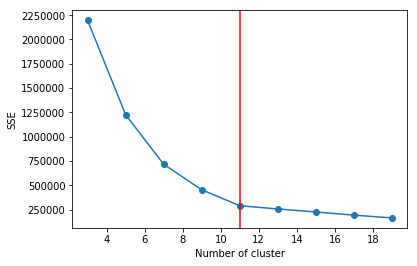

In [21]:
cluster_copy = cluster_data.copy()
sse = {}
k_list=[3, 5, 7, 9, 11, 13, 15, 17,19]
for k in k_list:
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(cluster_copy)
    cluster_copy["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()),marker='o')
plt.axvline(x=11, color='red')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

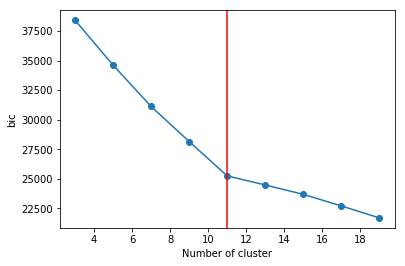

{3: 2197916.389830343,
 5: 1226231.024254892,
 7: 716277.1938422064,
 9: 453320.0935198182,
 11: 289391.0696723814,
 13: 255635.70288551477,
 15: 224925.36543520863,
 17: 192299.73827617953,
 19: 163633.60995745234}

In [22]:
n,d=cluster_data.shape
bic={}
for k,v in sse.items():
    bic[k]=n*math.log(v/n)+math.log(n)*k*(d+1)
plt.figure()
plt.plot(list(bic.keys()), list(bic.values()),marker='o')
plt.xlabel("Number of cluster")
plt.ylabel("bic")
plt.axvline(x=11, color='red')
plt.show()
sse

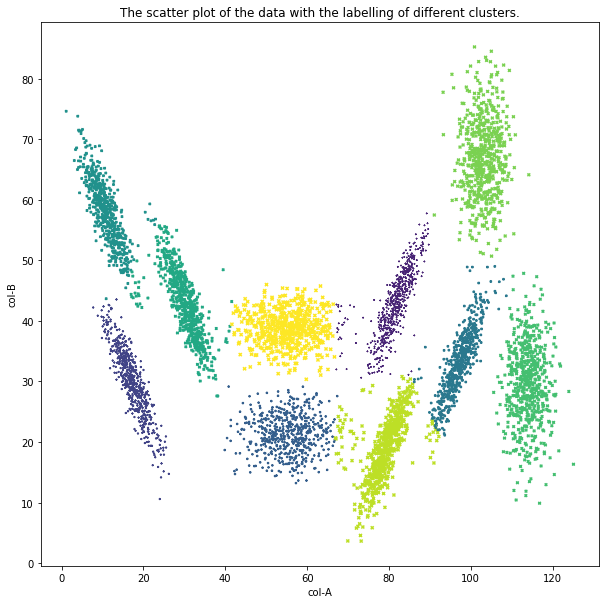

In [23]:
fkmeans =KMeans(n_clusters=11, max_iter=10000).fit(cluster_copy)
cluster_copy["clusters"]=fkmeans.labels_
plt.figure(figsize=(10,10))
plt.scatter(x=cluster_copy['A'],y=cluster_copy['B'],c=cluster_copy['clusters'], marker="x",
            s=cluster_copy['clusters'])
plt.xlabel("col-A")
plt.ylabel("col-B")
plt.title("The scatter plot of the data with the labelling of different clusters.")
plt.show()

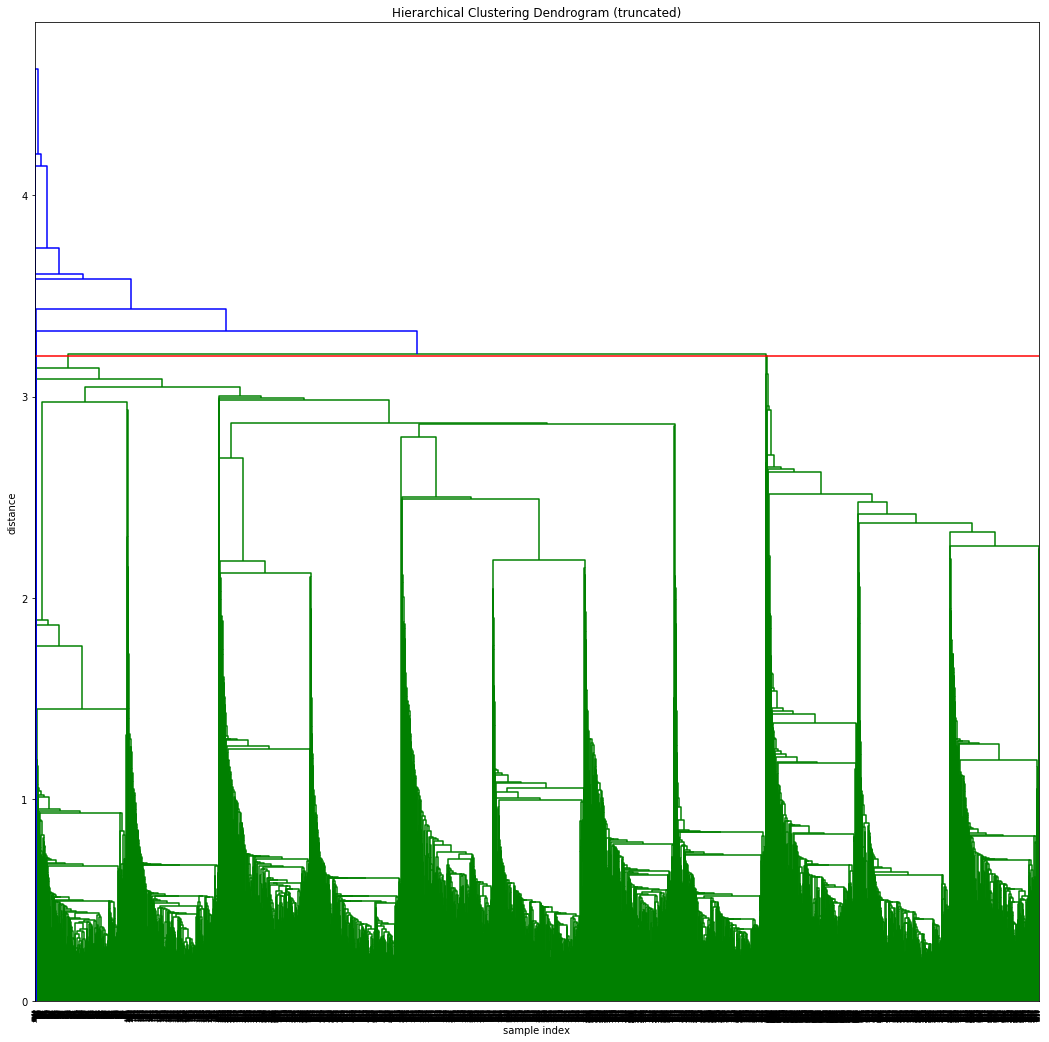

In [24]:
from scipy.cluster.hierarchy import dendrogram,linkage
hierarchical_cluster =cluster_data.copy()
Z = linkage(hierarchical_cluster,'single')
plt.figure(figsize=(18,18))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z
)
plt.axhline(y=3.2,c='R')
plt.show()

The number of clusters formed are: 11
[ 1  2  3  4  5  6  7  8  9 10 11]


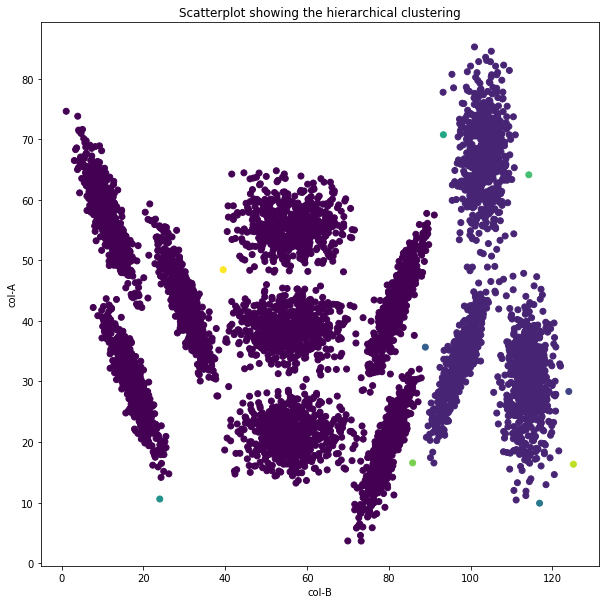

In [25]:
from scipy.cluster.hierarchy import fcluster
fc = fcluster(Z, 3.2, criterion='distance')
hierarchical_cluster['cluster']=fc
plt.figure(figsize=(10,10))
plt.scatter(hierarchical_cluster['A'],hierarchical_cluster['B'],c=fc)
plt.xlabel("col-B")
plt.ylabel("col-A")
plt.title("Scatterplot showing the hierarchical clustering")
print("The number of clusters formed are:", str(len(np.unique(fc))))
print(np.unique(fc))

AxesSubplot(0.125,0.125;0.775x0.755)


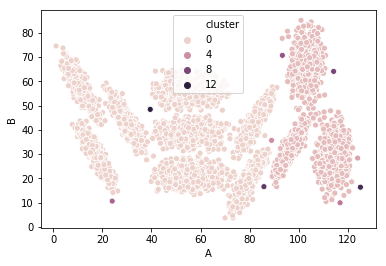

In [26]:
import seaborn as sns  # for visualizing the data in the form of clusters from the excel
point=sns.scatterplot(x='A', y='B', hue="cluster",  data=hierarchical_cluster)
print(point)
